<div style='color:white;margin:0;font-size:50px;font-family:Montserrat;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:500;background-color:#006400;padding:20px;'>Housing Values in Suburbs of Boston<br>(Predictive Modeling Using Linear Regression)</div>

<div style='width: 200px; height: 100px; background-color:#006400; border-radius: 20px; display: flex; justify-content: center; align-items: center; margin: 50px auto;'>
        <h5 style='text-align: center; font-family: Montserrat; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; color: white; margin: 0;'>
            conducted by Mitul Galav
        </h5>
    </div>

<br>    
<p style='text-align: center;'>
<img src='https://apps.bostonglobe.com/2023/10/special-projects/spotlight-boston-housing/static/7fed6649e460928f2f18646b184fb2a8/f3583/N7VNZRPE2JA7DOG52S6CRQL4QU.png' style='width: 900px; height: 500px;'>
</p>

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Problem Statement</div>

`Objective`:

The objective of this project is to develop a predictive model using linear regression to estimate the median value of owner-occupied homes (medv) in the suburbs of Boston. By leveraging a dataset containing various socioeconomic and environmental factors, we aim to identify the key determinants of housing values and accurately predict them.

`Data Description`:

The dataset comprises 506 observations of 14 variables, which capture a wide range of factors that may influence housing values in the Boston area. The variables included in the dataset are:

| Column  | Description                                                                 |
|---------|-----------------------------------------------------------------------------|
| crim    | Per capita crime rate by town.                                              |
| zn      | Proportion of residential land zoned for lots over 25,000 sq.ft.            |
| indus   | Proportion of non-retail business acres per town.                           |
| chas    | Charles River dummy variable (1 if tract bounds river; 0 otherwise).        |
| nox     | Nitrogen oxides concentration (parts per 10 million).                       |
| rm      | Average number of rooms per dwelling.                                       |
| age     | Proportion of owner-occupied units built prior to 1940.                     |
| dis     | Weighted mean of distances to five Boston employment centers.               |
| rad     | Index of accessibility to radial highways.                                  |
| tax     | Full-value property-tax rate per $10,000.                                   |
| ptratio | Pupil-teacher ratio by town.                                                |
| b       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.             |
| lstat   | Lower status of the population (percent).                                   |
| medv    | Median value of owner-occupied homes in $1000s (target variable).           |


`Source`:

Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

`Methodology`:

The project involves the following steps:

- ***Data Exploration and Preprocessing***: Understanding the dataset, handling missing values, and performing necessary transformations.
- ***Feature Selection***: Identifying the most significant features influencing the housing values.
- ***Model Development***: Constructing a linear regression model to predict the median value of homes.
- ***Model Evaluation***: Assessing the performance of the model using the Root Mean Squared Error (RMSE) metric.
- ***Model Interpretation***: Analyzing the coefficients of the regression model to understand the impact of each feature on housing values.

`Expected Outcome`:

By the end of this project, i aim to achieve the following:

- A well-fitted linear regression model that accurately predicts the median value of owner-occupied homes in Boston suburbs.
- An understanding of the primary factors affecting housing prices.
- A detailed evaluation of the model’s performance using RMSE, ensuring that the predictions are reliable and valid.

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Python libraries used</div>

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ignore all warnings
warnings.filterwarnings('ignore')

# Set sns fig facecolor
sns.set_style('ticks', rc={'axes.facecolor':'mistyrose'})

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Load the data</div>

In [112]:
housing_data = pd.read_csv('/Users/mitch/work_env/Portfolio/ML/LR/boston-housing/BostonHousing.csv')

In [113]:
housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Data Exploration</div>

In [226]:
# Get shape of data
print(f'Data Instances  : {housing_data.shape[0]}')
print(f'Data Attributes : {housing_data.shape[1]}')

Data Instances  : 506
Data Attributes : 14


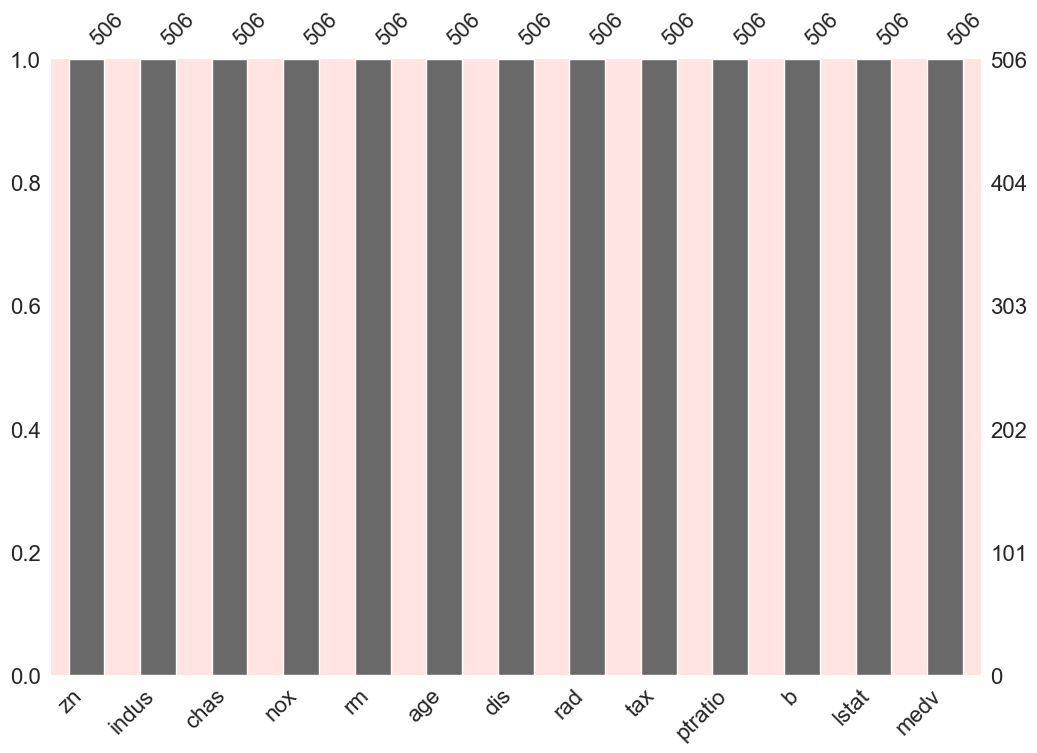

In [115]:
# Check for null values
msno.bar(housing_data.iloc[:, 1:], figsize=(12,8))
plt.show()

There are no null values in the training data

In [116]:
housing_data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [117]:
# Get more descriptive stats about training data
housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [118]:
# This function will get stats on given column
def get_stats(column_name):
    print(f'{column_name.name} max value : {column_name.max():.4f}')
    print(f'{column_name.name} min value : {column_name.min():.4f}')
    print(f'{column_name.name} mean value : {np.mean(column_name):.4f}')
    print(f'{column_name.name} median value : {np.median(column_name):.4f}')
    print(f'{column_name.name} mode value : {ss.mode(column_name)[0][0]:.4f}')
    print(f'{column_name.name} variance : {np.var(column_name):.4f}')
    print(f'{column_name.name} standard deviation : {np.std(column_name):.4f}')

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>crim</b></span>

In [119]:
crim_stats = get_stats(housing_data['crim'])

crim max value : 88.9762
crim min value : 0.0063
crim mean value : 3.6135
crim median value : 0.2565
crim mode value : 0.0150
crim variance : 73.8404
crim standard deviation : 8.5930


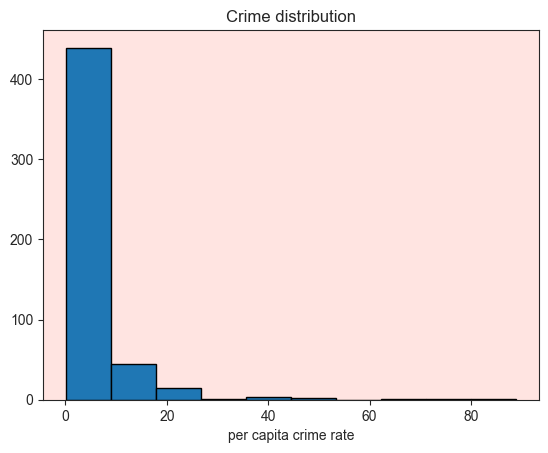

In [120]:
plt.hist(housing_data['crim'], bins=10, edgecolor='black')
plt.title('Crime distribution')
plt.xlabel('per capita crime rate')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>zn</b></span>

In [121]:
zn_stats = get_stats(housing_data['zn'])

zn max value : 100.0000
zn min value : 0.0000
zn mean value : 11.3636
zn median value : 0.0000
zn mode value : 0.0000
zn variance : 542.8618
zn standard deviation : 23.2994


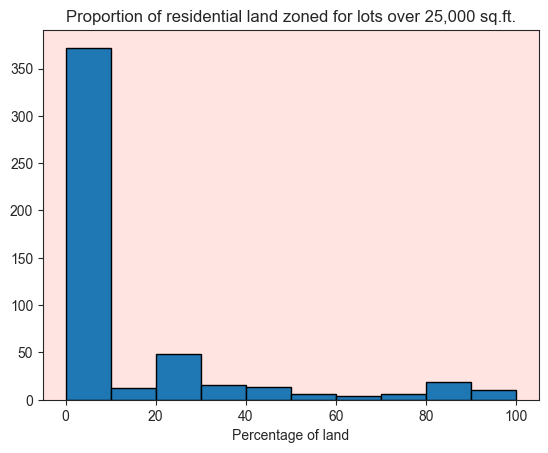

In [122]:
plt.hist(housing_data['zn'], bins=10, edgecolor='black')
plt.title('Proportion of residential land zoned for lots over 25,000 sq.ft.')
plt.xlabel('Percentage of land')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>indus</b></span>

In [123]:
indus_stats = get_stats(housing_data['indus'])

indus max value : 27.7400
indus min value : 0.4600
indus mean value : 11.1368
indus median value : 9.6900
indus mode value : 18.1000
indus variance : 46.9714
indus standard deviation : 6.8536


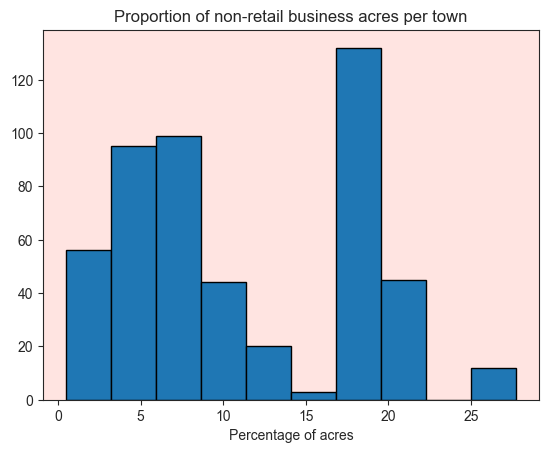

In [124]:
plt.hist(housing_data['indus'], bins=10, edgecolor='black')
plt.title('Proportion of non-retail business acres per town')
plt.xlabel('Percentage of acres')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>chas</b></span>

In [125]:
chas_stats = get_stats(housing_data['chas'])

chas max value : 1.0000
chas min value : 0.0000
chas mean value : 0.0692
chas median value : 0.0000
chas mode value : 0.0000
chas variance : 0.0644
chas standard deviation : 0.2537


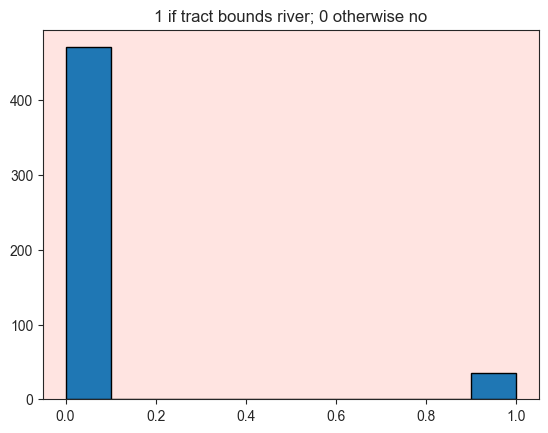

In [126]:
plt.hist(housing_data['chas'], bins=10, edgecolor='black')
plt.title('1 if tract bounds river; 0 otherwise no')
plt.xlabel('')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>nox</b></span>

In [127]:
nox_stats = get_stats(housing_data['nox'])

nox max value : 0.8710
nox min value : 0.3850
nox mean value : 0.5547
nox median value : 0.5380
nox mode value : 0.5380
nox variance : 0.0134
nox standard deviation : 0.1158


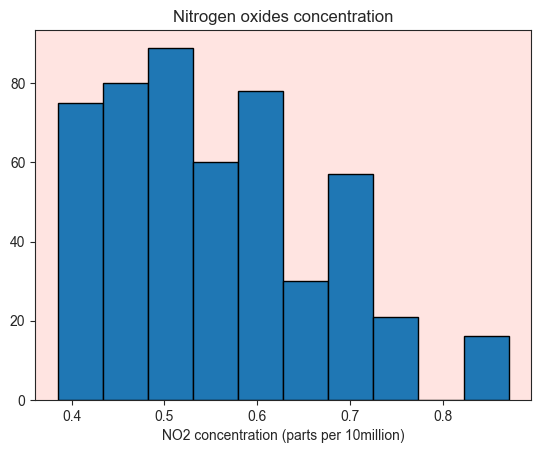

In [128]:
plt.hist(housing_data['nox'], bins=10, edgecolor='black')
plt.title('Nitrogen oxides concentration')
plt.xlabel('NO2 concentration (parts per 10million)')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>rm</b></span>

In [129]:
rm_stats = get_stats(housing_data['rm'])

rm max value : 8.7800
rm min value : 3.5610
rm mean value : 6.2846
rm median value : 6.2085
rm mode value : 5.7130
rm variance : 0.4927
rm standard deviation : 0.7019


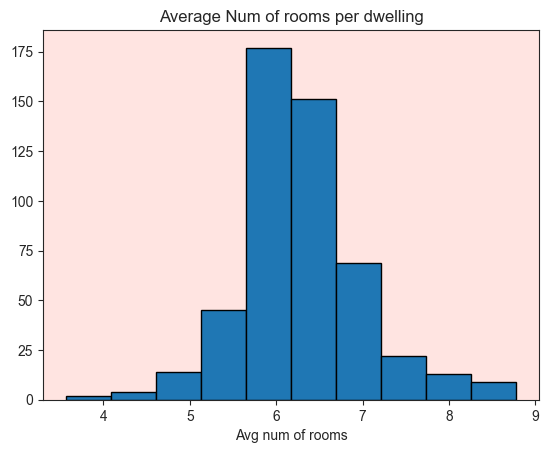

In [130]:
plt.hist(housing_data['rm'], bins=10, edgecolor='black')
plt.title('Average Num of rooms per dwelling')
plt.xlabel('Avg num of rooms')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>age</b></span>

In [131]:
age_stats = get_stats(housing_data['age'])

age max value : 100.0000
age min value : 2.9000
age mean value : 68.5749
age median value : 77.5000
age mode value : 100.0000
age variance : 790.7925
age standard deviation : 28.1210


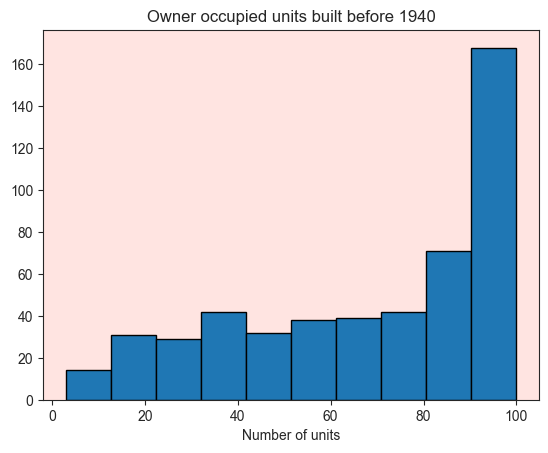

In [132]:
plt.hist(housing_data['age'], bins=10, edgecolor='black')
plt.title('Owner occupied units built before 1940')
plt.xlabel('Number of units')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>dis</b></span>

In [133]:
dis_stats = get_stats(housing_data['dis'])

dis max value : 12.1265
dis min value : 1.1296
dis mean value : 3.7950
dis median value : 3.2074
dis mode value : 3.4952
dis variance : 4.4253
dis standard deviation : 2.1036


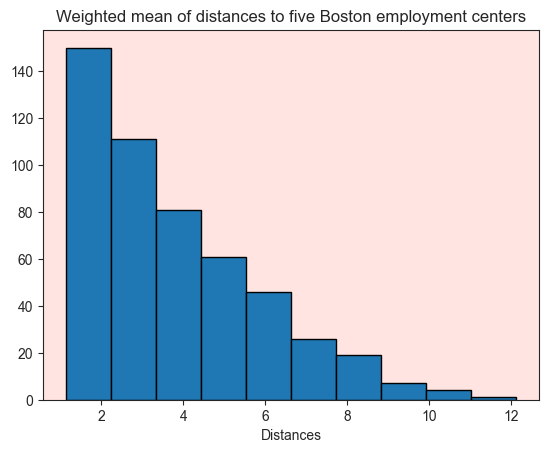

In [134]:
plt.hist(housing_data['dis'], bins=10, edgecolor='black')
plt.title('Weighted mean of distances to five Boston employment centers')
plt.xlabel('Distances')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>rad</b></span>

In [135]:
rad_stats = get_stats(housing_data['rad'])

rad max value : 24.0000
rad min value : 1.0000
rad mean value : 9.5494
rad median value : 5.0000
rad mode value : 24.0000
rad variance : 75.6665
rad standard deviation : 8.6987


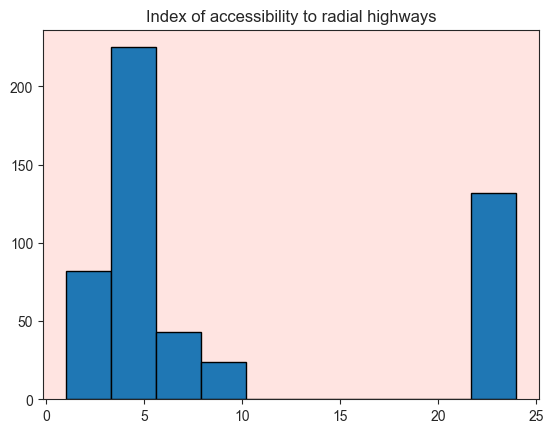

In [136]:
plt.hist(housing_data['rad'], bins=10, edgecolor='black')
plt.title('Index of accessibility to radial highways')
plt.xlabel('')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>tax</b></span>

In [137]:
tax_stats = get_stats(housing_data['tax'])

tax max value : 711.0000
tax min value : 187.0000
tax mean value : 408.2372
tax median value : 330.0000
tax mode value : 666.0000
tax variance : 28348.6236
tax standard deviation : 168.3705


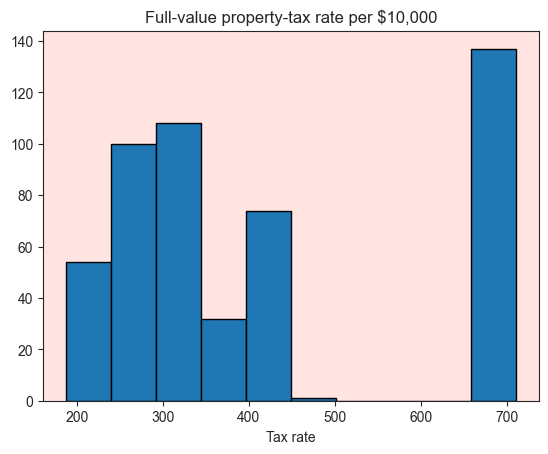

In [138]:
plt.hist(housing_data['tax'], bins=10, edgecolor='black')
plt.title('Full-value property-tax rate per $10,000')
plt.xlabel('Tax rate')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>ptratio</b></span>

In [139]:
pratio_stats = get_stats(housing_data['ptratio'])

ptratio max value : 22.0000
ptratio min value : 12.6000
ptratio mean value : 18.4555
ptratio median value : 19.0500
ptratio mode value : 20.2000
ptratio variance : 4.6777
ptratio standard deviation : 2.1628


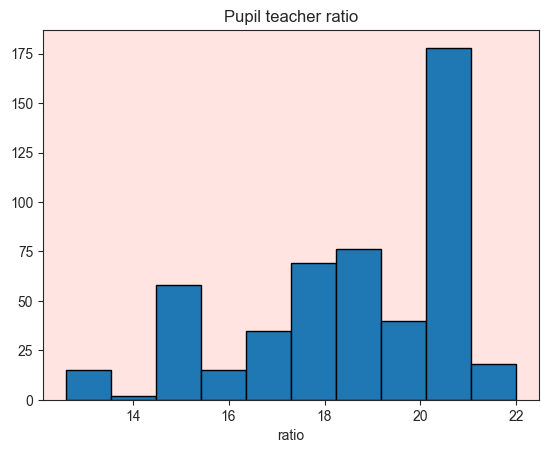

In [140]:
plt.hist(housing_data['ptratio'], bins=10, edgecolor='black')
plt.title('Pupil teacher ratio')
plt.xlabel('ratio')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>black</b></span>

In [142]:
black_stats = get_stats(housing_data['b'])

b max value : 396.9000
b min value : 0.3200
b mean value : 356.6740
b median value : 391.4400
b mode value : 396.9000
b variance : 8318.2804
b standard deviation : 91.2046


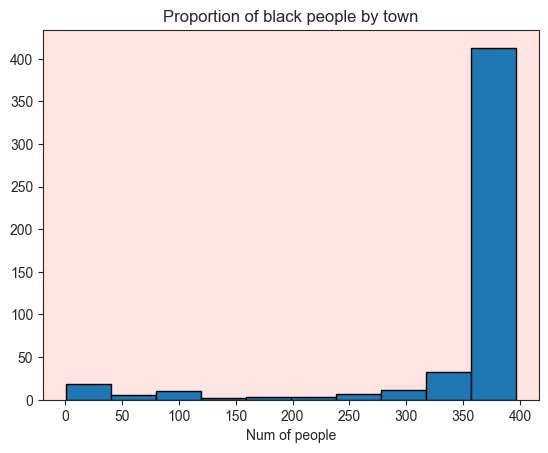

In [144]:
plt.hist(housing_data['b'], bins=10, edgecolor='black')
plt.title('Proportion of black people by town')
plt.xlabel('Num of people')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>lstat</b></span>

In [35]:
lstat_stats = get_stats(housing_data['lstat'])

lstat max value : 37.9700
lstat min value : 1.7300
lstat mean value : 12.5154
lstat median value : 10.9700
lstat mode value : 18.1300
lstat variance : 49.8035
lstat standard deviation : 7.0572


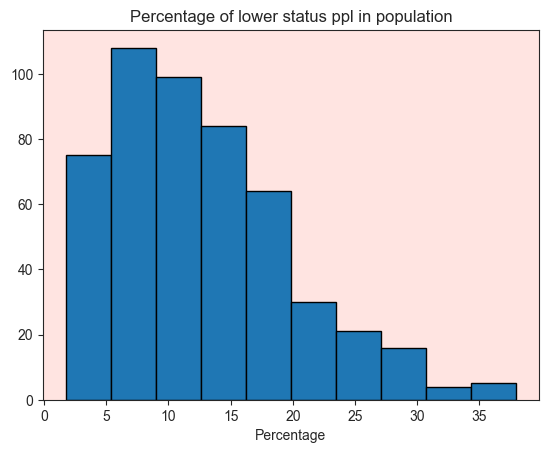

In [145]:
plt.hist(housing_data['lstat'], bins=10, edgecolor='black')
plt.title('Percentage of lower status ppl in population')
plt.xlabel('Percentage')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:yellow;'><b>medv (Outcome)</b></span>


In [146]:
medv_stats = get_stats(housing_data['medv'])

medv max value : 50.0000
medv min value : 5.0000
medv mean value : 22.5328
medv median value : 21.2000
medv mode value : 50.0000
medv variance : 84.4196
medv standard deviation : 9.1880


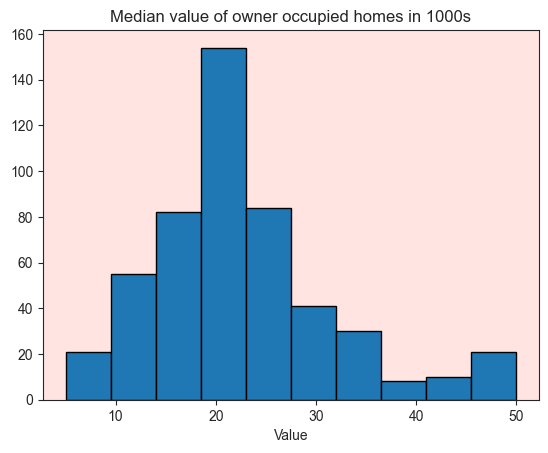

In [147]:
plt.hist(housing_data['medv'], bins=10, edgecolor='black')
plt.title('Median value of owner occupied homes in 1000s')
plt.xlabel('Value')
plt.show()

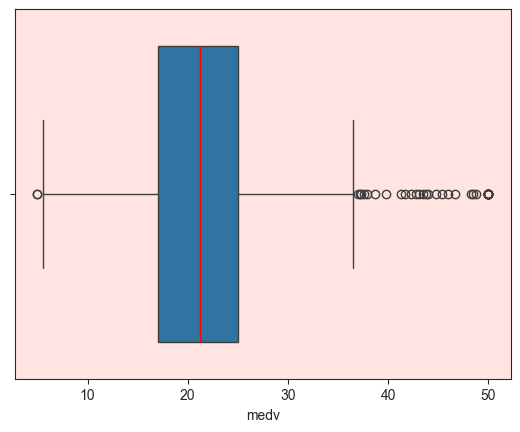

In [191]:
sns.boxplot(data=housing_data, x='medv', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

In [192]:
# Dealing with outliers
q1 = np.quantile(housing_data['medv'], 0.25)
q3 = np.quantile(housing_data['medv'], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
housing_datav2 = housing_data[(housing_data['medv'] >= lower_bound) & (housing_data['medv'] <= upper_bound)]

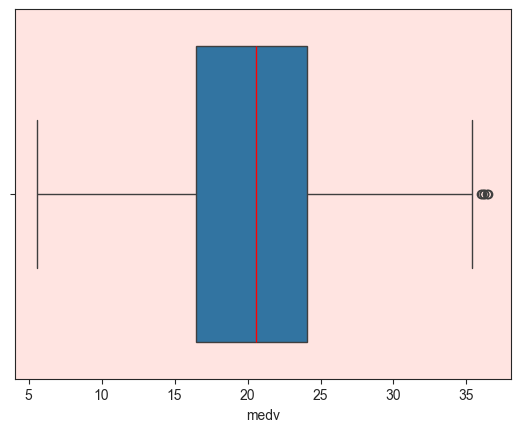

In [193]:
sns.boxplot(data=housing_datav2, x='medv', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Feature Selection</div>

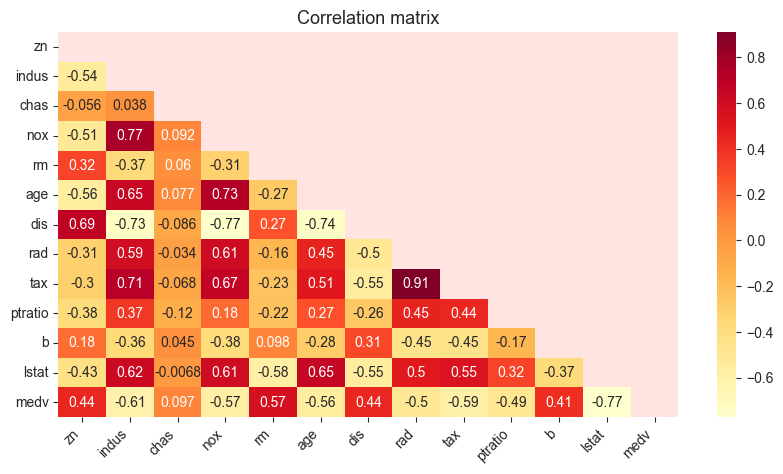

In [194]:
plt.figure(figsize=(10,5))
sns.heatmap(housing_datav2.iloc[:, 1:].corr(), annot=True, cmap='YlOrRd', mask=np.triu(housing_datav2.iloc[:, 1:].corr()))
plt.title('Correlation matrix', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.show()

#### `Medv and rm`

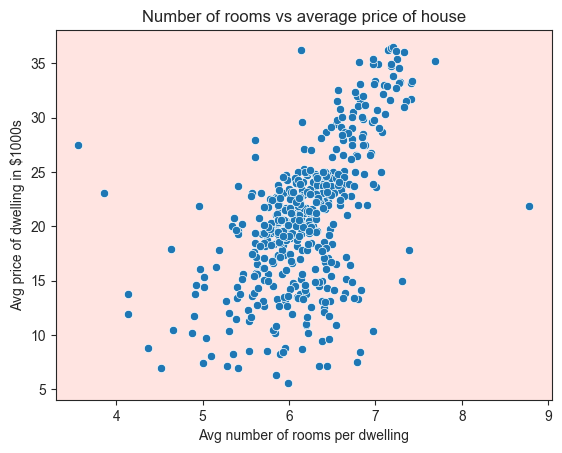

In [195]:
sns.scatterplot(data=housing_datav2, x='rm', y='medv')
plt.title('Number of rooms vs average price of house')
plt.xlabel('Avg number of rooms per dwelling')
plt.ylabel('Avg price of dwelling in $1000s')
plt.show()

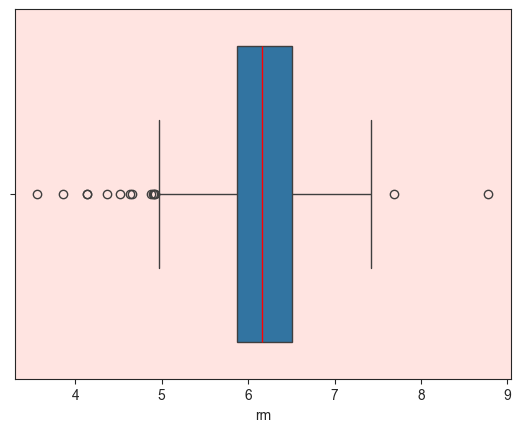

In [196]:
sns.boxplot(data=housing_datav2, x='rm', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

#### `Medv and zn`

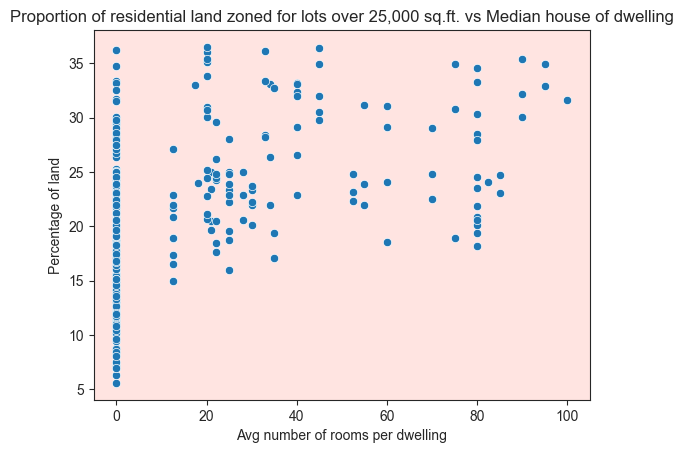

In [197]:
sns.scatterplot(data=housing_datav2, x='zn', y='medv')
plt.title('Proportion of residential land zoned for lots over 25,000 sq.ft. vs Median house of dwelling')
plt.xlabel('Avg number of rooms per dwelling')
plt.ylabel('Percentage of land')
plt.show()

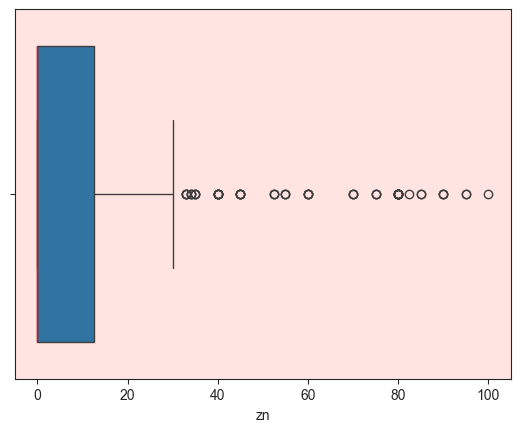

In [198]:
sns.boxplot(data=housing_datav2, x='zn', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

#### `Medv and b`

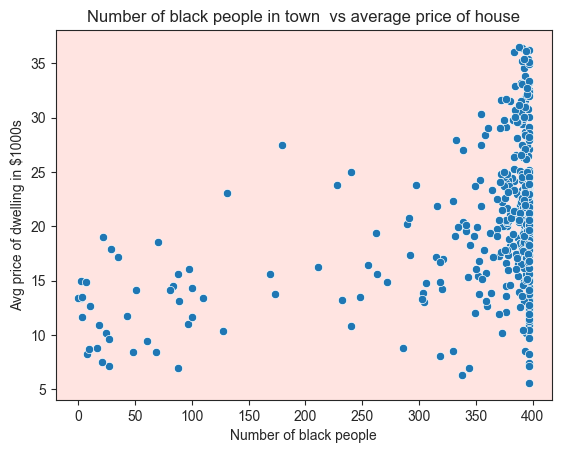

In [199]:
sns.scatterplot(data=housing_datav2, x='b', y='medv')
plt.title('Number of black people in town  vs average price of house')
plt.xlabel('Number of black people')
plt.ylabel('Avg price of dwelling in $1000s')
plt.show()

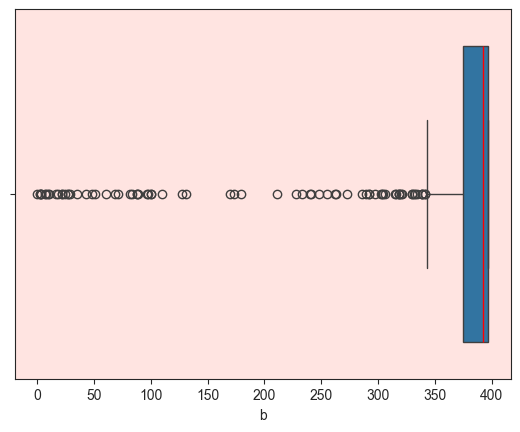

In [201]:
sns.boxplot(data=housing_datav2, x='b', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

#### `Medv and dis`

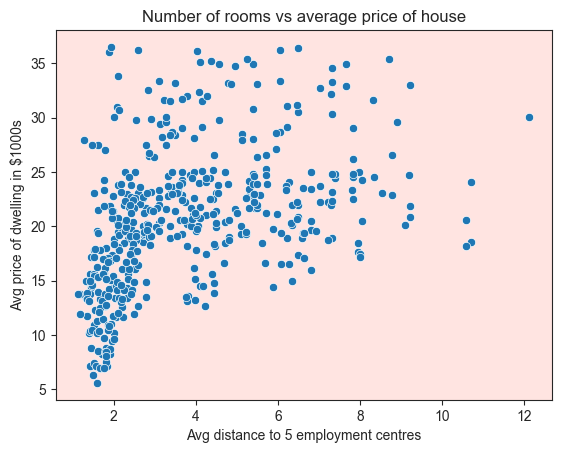

In [215]:
sns.scatterplot(data=housing_datav2, x='dis', y='medv')
plt.title('Number of rooms vs average price of house')
plt.xlabel('Avg distance to 5 employment centres')
plt.ylabel('Avg price of dwelling in $1000s')
plt.show()

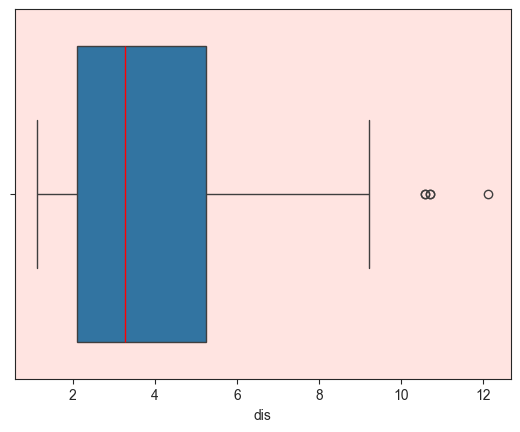

In [216]:
sns.boxplot(data=housing_datav2, x='dis', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Model Development</div>

#### `Multiple Linear Regression`

In [202]:
# Pick out relevant variables
X = housing_datav2.drop('medv', axis=1)
Y = housing_datav2.medv

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [203]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [204]:
# Train the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [205]:
# Make predictions
y_pred = model.predict(x_test_scaled)
y_train_pred = model.predict(x_train_scaled)

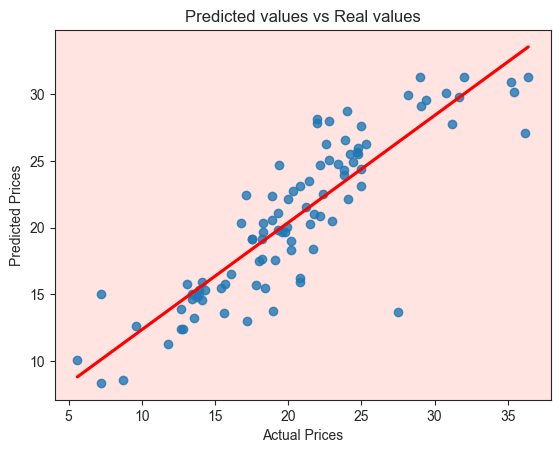

In [228]:
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color': 'red'})
plt.title('Predicted values vs Real values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#### `Simple Linear Regression`

In [207]:
X2 = housing_datav2.loc[:, ['rm']]
Y2 = housing_datav2.medv

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [208]:
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

LinearRegression()

In [209]:
y2_pred = model2.predict(x2_test)
y2_train_pred = model2.predict(x2_train)

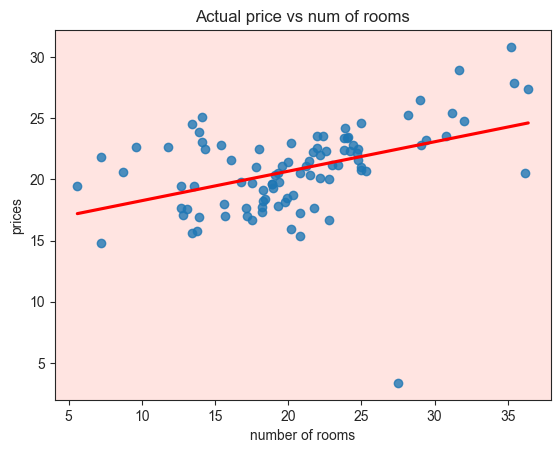

In [229]:
sns.regplot(x=y2_test, y=y2_pred, ci=None, line_kws={'color': 'red'})
plt.title('Actual price vs num of rooms')
plt.xlabel('number of rooms')
plt.ylabel('prices')
plt.show()

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden'>Model Evaluation</div>

#### `Multiple Linear Regression`

In [211]:
# Output the model's coefficients
print(f'Coefficients: {model.coef_}')
print('\n')
print(f'Intercept: {model.intercept_}')

# Calculate the Mean Squared Error RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'RMSE : {rmse}')

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 score : {r2}')

Coefficients: [-0.77854597  0.66969257 -0.29958062  0.17028242 -1.51723649  1.36647496
 -0.66783859 -2.11851768  1.72312461 -1.83493857 -1.61697935  0.73141222
 -2.17827962]


Intercept: 20.77661290322581
Mean Squared Error: 9.758130180949518
RMSE : 3.1238005987817976
R2 score : 0.7567488866765015


#### `Linear Regression`

In [212]:
# Output the model's coefficients
print(f'Coefficients: {model2.coef_}')
print('\n')
print(f'Intercept: {model2.intercept_}')

# Calculate the Mean Squared Error RMSE
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'RMSE : {rmse}')

# Calculate r2_score
r2 = r2_score(y2_test, y2_pred)
print(f'R2 score : {r2}')

Coefficients: [6.65430085]


Intercept: -20.3424228485592
Mean Squared Error: 33.65885867649036
RMSE : 5.801625520187455
R2 score : 0.1609504388208639


# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#006400;overflow:hidden">Model Interpretation</div>

This report compares the performance of two linear regression models used to predict median home values (`medv`). The simple linear regression model, utilises only the number of rooms (`rm`) as a predictor. The multiple linear regression model, incorporates multiple predictors. The objective is to assess the predictive accuracy and fit of each model and determine which one offers better performance for predicting median home values.

1. `Simple Linear Regression Model (Using rm)`:

- ***Coefficients***: The coefficient for rm is approximately 6.65, suggesting that, on average, each additional room is associated with an increase of about 6.65 units in the median home value.
- ***Intercept***: The intercept is approximately -20.34, representing the predicted median home value when the number of rooms is zero.
- ***Mean Squared Error (MSE)***: The MSE is approximately 33.65, indicating the average squared difference between the actual and predicted values.
- ***Root Mean Squared Error (RMSE)***: The RMSE is approximately 5.80, providing a measure of the average error in the same units as medv.
- ***R-squared (R²) Score***: The R² score is approximately 0.16, meaning that about 16% of the variance in the median home value is explained by the number of rooms.

2. `Multiple Linear Regression Model (Using Multiple Predictors)`:

- ***Coefficients***: The model incorporates multiple predictors, each with its own coefficient.
- ***Intercept***: The intercept is approximately 20.77, indicating the predicted median home value when all predictors are zero.
- ***Mean Squared Error (MSE)***: The MSE is approximately 9.75, indicating a lower average squared difference between actual and predicted values compared to the simple linear regression model.
- ***Root Mean Squared Error (RMSE)***: The RMSE is approximately 3.12, indicating a lower average error compared to the simple linear regression model.
- ***R-squared (R²) Score***: The R² score is approximately 0.756, indicating that approximately 75.6% of the variance in the median home value is explained by the multiple predictors.

3. `Comparison and Conclusion`:

- The multiple linear regression model outperforms the simple linear regression model in terms of MSE, RMSE, and R² score, indicating better predictive accuracy and model fit.
- The multiple linear regression model explains a larger proportion of the variance in median home values compared to the simple linear regression model.
- Incorporating multiple predictors in the model improves predictive accuracy and provides a more comprehensive understanding of factors influencing median home values.
- Further analysis and refinement of the multiple linear regression model may lead to even better predictive performance and insights into the relationships between predictors and median home values.

4. `Recommendations`:

- Continue refining the multiple linear regression model by exploring additional predictors and feature engineering techniques.
- Evaluate the model's performance on independent test datasets to ensure robustness and generalizability.
- Conduct further analysis to identify outliers or influential data points that may affect the model's performance.
- Monitor real-world performance and iterate on the model as new data becomes available.

Overall, the multiple linear regression model offers better predictive accuracy and model fit compared to the simple linear regression model, providing valuable insights into the factors influencing median home values.